Name: Limin Zhou  
Student ID: 22634156  
  
  
Peoject1: Classify ecoli, Use Decision Tree, train on unscaled and scaled set.  
Peoject2: Predict Compressive Strength.
* Decision Tree Regressor + unscaled Data
* Decision Tree Regressor + scaled Data
* Support Vector Regressor + scaled Data

---



# Project 1

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# Read file (ecoli.data)
df = pd.read_csv('ecoli.data',header=None)

In [ ]:
#check the data of ecoli
print(df)

                                                     0
0    AAT_ECOLI   0.49  0.29  0.48  0.50  0.56  0.24...
1    ACEA_ECOLI  0.07  0.40  0.48  0.50  0.54  0.35...
2    ACEK_ECOLI  0.56  0.40  0.48  0.50  0.49  0.37...
3    ACKA_ECOLI  0.59  0.49  0.48  0.50  0.52  0.45...
4    ADI_ECOLI   0.23  0.32  0.48  0.50  0.55  0.25...
..                                                 ...
331  TREA_ECOLI  0.74  0.56  0.48  0.50  0.47  0.68...
332  UGPB_ECOLI  0.71  0.57  0.48  0.50  0.48  0.35...
333  USHA_ECOLI  0.61  0.60  0.48  0.50  0.44  0.39...
334  XYLF_ECOLI  0.59  0.61  0.48  0.50  0.42  0.42...
335  YTFQ_ECOLI  0.74  0.74  0.48  0.50  0.31  0.53...

[336 rows x 1 columns]


## Make a dataframe containing both values and lables

In [ ]:
labels = ['Sequence_Name','mcg','gvh','lip','chg','aac','alm1','alm2','class']

# get values from dataframe (each line in one list, so we need to spilt it)
data_list = list(df.values)

# create a list to save data
data_list_split = []
for line in data_list:
  # split each line
  line = str(line).split( )
  # remove the first three characters ( '[' )
  line[0] = line[0][2:]

  # convert type (string to float), because spilt make all values to string.
  for i in range(1,8):
    line[i] = float(line[i])

  # remove the last three characters ( ']' )
  line[-1] = line[-1][:-2]
  data_list_split.append(line)

# use pandas make a dataframe
df_with_labels = pd.DataFrame(data_list_split, columns=labels)
df_with_labels

,Sequence_Name,mcg,gvh,lip,chg,aac,alm1,alm2,class
0,AAT_ECOLI,0.49,0.29,0.48,0.5,0.56,0.24,0.35,cp
1,ACEA_ECOLI,0.07,0.40,0.48,0.5,0.54,0.35,0.44,cp
2,ACEK_ECOLI,0.56,0.40,0.48,0.5,0.49,0.37,0.46,cp
3,ACKA_ECOLI,0.59,0.49,0.48,0.5,0.52,0.45,0.36,cp
4,ADI_ECOLI,0.23,0.32,0.48,0.5,0.55,0.25,0.35,cp
...,...,...,...,...,...,...,...,...,...
331,TREA_ECOLI,0.74,0.56,0.48,0.5,0.47,0.68,0.30,pp
332,UGPB_ECOLI,0.71,0.57,0.48,0.5,0.48,0.35,0.32,pp
333,USHA_ECOLI,0.61,0.60,0.48,0.5,0.44,0.39,0.38,pp
334,XYLF_ECOLI,0.59,0.61,0.48,0.5,0.42,0.42,0.37,pp


Done! Processed data.

# Part1. Visualize Data

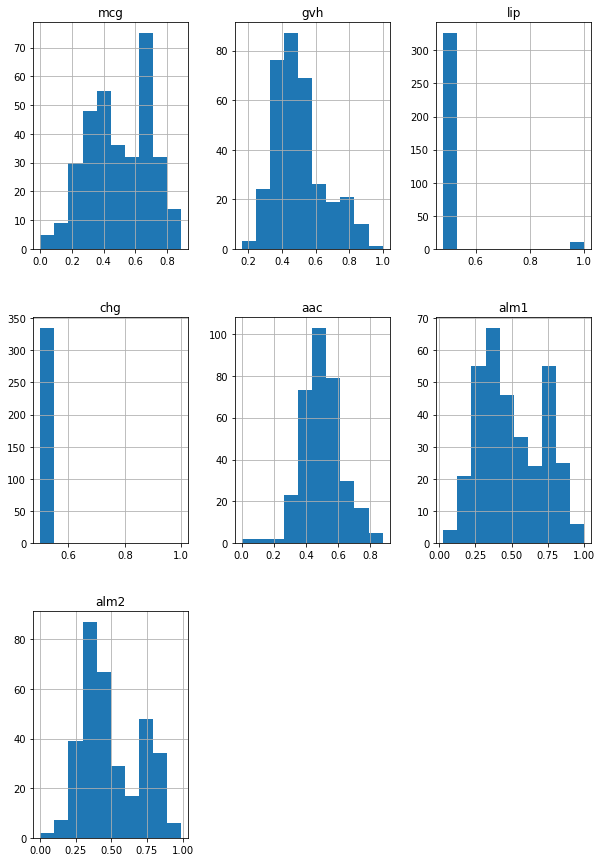

In [ ]:
df_with_labels.hist(figsize = (10,15));

#### Clean Data

* remove classes which have less than 10 instances

In [ ]:
# Find out the name of classes which have less than 10 instances
class_value_counts = df_with_labels['class'].value_counts()
class_less_than_ten = list(class_value_counts[class_value_counts<10].index)
print('Less than 10 instances (list of classes name): ',class_less_than_ten)
print()
print(class_value_counts)

Less than 10 instances (list of classes name):  ['omL', 'imL', 'imS']

cp     143
im      77
pp      52
imU     35
om      20
omL      5
imL      2
imS      2
Name: class, dtype: int64


As the output above, 9 (5+2+2) rows need to be removed

In [ ]:
# Remove rows from dataframe
df_without_small_Instance_Class = df_with_labels[~df_with_labels['class'].isin(class_less_than_ten)]
df_without_small_Instance_Class = df_without_small_Instance_Class.reset_index()
print(df_without_small_Instance_Class)

     index Sequence_Name   mcg   gvh   lip  chg   aac  alm1  alm2 class
0        0     AAT_ECOLI  0.49  0.29  0.48  0.5  0.56  0.24  0.35    cp
1        1    ACEA_ECOLI  0.07  0.40  0.48  0.5  0.54  0.35  0.44    cp
2        2    ACEK_ECOLI  0.56  0.40  0.48  0.5  0.49  0.37  0.46    cp
3        3    ACKA_ECOLI  0.59  0.49  0.48  0.5  0.52  0.45  0.36    cp
4        4     ADI_ECOLI  0.23  0.32  0.48  0.5  0.55  0.25  0.35    cp
..     ...           ...   ...   ...   ...  ...   ...   ...   ...   ...
322    331    TREA_ECOLI  0.74  0.56  0.48  0.5  0.47  0.68  0.30    pp
323    332    UGPB_ECOLI  0.71  0.57  0.48  0.5  0.48  0.35  0.32    pp
324    333    USHA_ECOLI  0.61  0.60  0.48  0.5  0.44  0.39  0.38    pp
325    334    XYLF_ECOLI  0.59  0.61  0.48  0.5  0.42  0.42  0.37    pp
326    335    YTFQ_ECOLI  0.74  0.74  0.48  0.5  0.31  0.53  0.52    pp

[327 rows x 10 columns]


Done! Removed the rows of classes less than 10 instances.

* Deal with the non-numerical data

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

# get this non-numerical column
sequence_Name_col = df_without_small_Instance_Class[['Sequence_Name']]
print(sequence_Name_col.head())

# transform category to numerical
ordinal_encoder = OrdinalEncoder()
sequence_Name_col_encoded = ordinal_encoder.fit_transform(sequence_Name_col)

  Sequence_Name
0     AAT_ECOLI
1    ACEA_ECOLI
2    ACEK_ECOLI
3    ACKA_ECOLI
4     ADI_ECOLI


In [ ]:
print(sequence_Name_col_encoded[:5])

[[1.]
 [2.]
 [3.]
 [4.]
 [5.]]


In [ ]:
# drop the non-numerical column
df_num = df_without_small_Instance_Class.drop('Sequence_Name',axis=1)

# Also, drop the index column
df_num = df_num.drop('index',axis=1)

For Classification, features wirh all unique values are useless. I decided drop it instead of keeping it.

* Check for null values

In [ ]:
df_num[df_num.isnull().any(axis=1)]

,mcg,gvh,lip,chg,aac,alm1,alm2,class


double check

In [ ]:
NoneRowIndex = list(df_num[df_num.isin(['None']).any(axis=1)].index)

In [ ]:
print('Rows index of None Value: ',NoneRowIndex)

Rows index of None Value:  []


No None value found

* Split data

In [ ]:
# Prepare X
X = df_num.drop('class',axis=1).values
print(X[:5])

[[0.49 0.29 0.48 0.5  0.56 0.24 0.35]
 [0.07 0.4  0.48 0.5  0.54 0.35 0.44]
 [0.56 0.4  0.48 0.5  0.49 0.37 0.46]
 [0.59 0.49 0.48 0.5  0.52 0.45 0.36]
 [0.23 0.32 0.48 0.5  0.55 0.25 0.35]]


In [ ]:
# Prepare y 
y = df_num['class'].copy().values
print(y[:5])

['cp' 'cp' 'cp' 'cp' 'cp']


Train Test Split Done

# Part2: Train model on unscaled data and scaled data.

### 1. Unscaled:

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# set min_samples_leaf, criterion and max_depth as parameters (each with 2-3 options)
params1 = {'min_samples_leaf': [1,3,5], 'criterion': ['gini', 'entropy'],'max_depth': [5,3,4]}
grid_search_cv_unscaled = GridSearchCV(DecisionTreeClassifier(random_state=1), params1, verbose=1, cv=3)

grid_search_cv_unscaled.fit(X, y);

Fitting 3 folds for each of 18 candidates, totalling 54 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  54 out of  54 | elapsed:    0.1s finished


In [ ]:
unscaled_dt = grid_search_cv_unscaled.best_estimator_
print('(Unscaled set)best params: ',grid_search_cv_unscaled.best_params_)

(Unscaled set)best params:  {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 3}


## 2. Scaled

Import standard scaler and scale both train and test set

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
# scale data:
scaled_data = scaler.fit_transform(X)

In [ ]:
params2 = {'min_samples_leaf': [1,5,10], 'criterion': ['gini', 'entropy'],'max_depth': [3,5,6]}
grid_search_cv_scaled = GridSearchCV(DecisionTreeClassifier(random_state=1), params2, verbose=1, cv=3)
grid_search_cv_scaled.fit(scaled_data, y);

Fitting 3 folds for each of 18 candidates, totalling 54 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  54 out of  54 | elapsed:    0.1s finished


In [ ]:
scaled_dt = grid_search_cv_scaled.best_estimator_
print('(Scaled set) best params: ',grid_search_cv_scaled.best_params_)

(Scaled set) best params:  {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 5}


## 3. Compare

In [ ]:
from sklearn.model_selection import cross_val_predict

y_pred_unscaled = cross_val_predict(unscaled_dt, X, y, cv=3);
y_pred_scaled = cross_val_predict(scaled_dt, scaled_data, y, cv=3);

* Compare average F1-scores

In [ ]:
from sklearn.metrics import f1_score

In [ ]:
unscaled_f1 = f1_score(y, y_pred_unscaled, average='weighted')
scaled_f1 = f1_score(y, y_pred_scaled, average='weighted')

In [ ]:
print('unscaled set f1 score: ',unscaled_f1 )
print('scaled set f1 score: ',scaled_f1 )

unscaled set f1 score:  0.8305455058393724
scaled set f1 score:  0.8220382689019724


* Compare confusion matrixs

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

def draw_matrix(labels_test,pred):
  cm = confusion_matrix(labels_test, pred)
  cmd = ConfusionMatrixDisplay(cm, display_labels=['cp','im','pp','imU','om'])
  fig, ax = plt.subplots(figsize=(7,7))
  cmd.plot(ax=ax,values_format='d')

confusion matrix of unscaled set: 


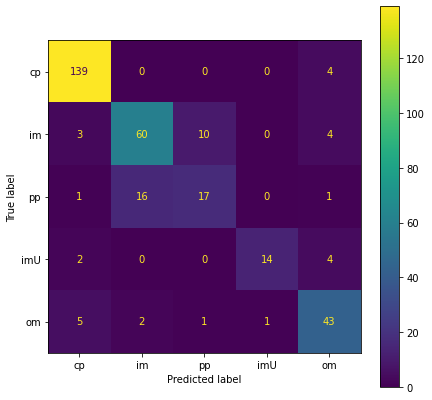

In [ ]:
print('confusion matrix of unscaled set: ')
draw_matrix(y,y_pred_unscaled)

confusion matrix of scaled set: 


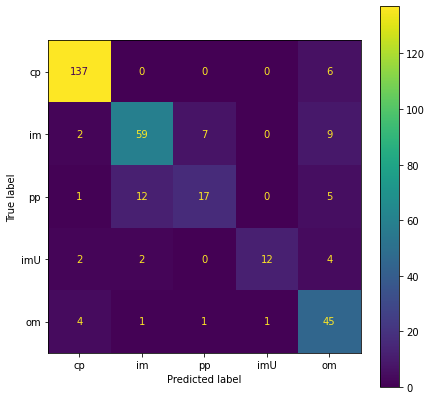

In [ ]:
print('confusion matrix of scaled set: ')
draw_matrix(y,y_pred_scaled)

The result of unscaled set is better.

## Conclusion: In this Porject, for decision tree, unscaled set is better than scaled set.

---



# Project 2

## 1. read data

In [ ]:
# read slump data from file
pslump = pd.read_csv('slump_test.data')

In [ ]:
# check first few lines
pslump.head()

,No,Cement,Slag,Fly ash,Water,SP,Coarse Aggr.,Fine Aggr.,SLUMP(cm),FLOW(cm),Compressive Strength (28-day)(Mpa)
0,1,273.0,82.0,105.0,210.0,9.0,904.0,680.0,23.0,62.0,34.99
1,2,163.0,149.0,191.0,180.0,12.0,843.0,746.0,0.0,20.0,41.14
2,3,162.0,148.0,191.0,179.0,16.0,840.0,743.0,1.0,20.0,41.81
3,4,162.0,148.0,190.0,179.0,19.0,838.0,741.0,3.0,21.5,42.08
4,5,154.0,112.0,144.0,220.0,10.0,923.0,658.0,20.0,64.0,26.82


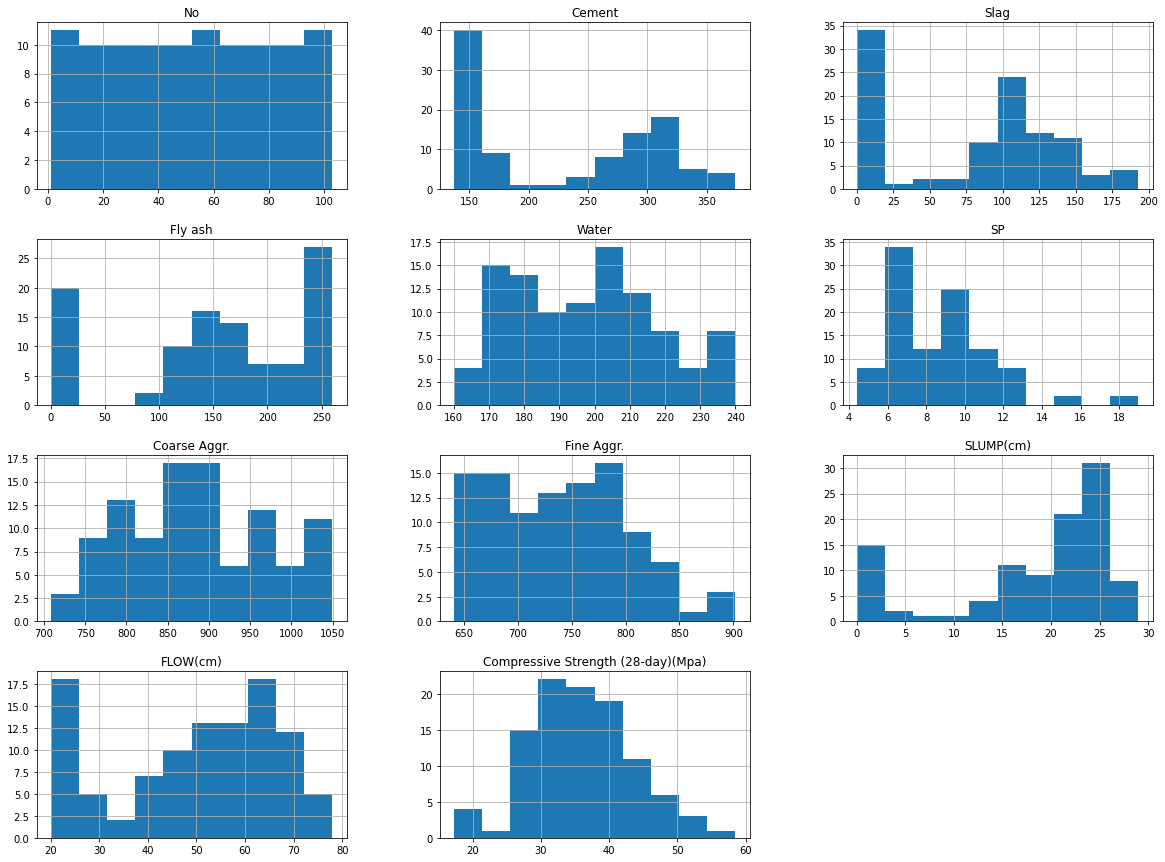

In [ ]:
# check distribution
pslump.hist(figsize=(20,15));

## 2. prepare data 

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

def prepareData(df, y_need, x_drop,scaler):
  # drop missing values, and then reset index
  df = df.dropna().reset_index(drop=True)
  # split X and y
  y = df[y_need].copy().values.ravel()
  df = df.drop(x_drop,axis=1)
  X = df.values
  # create the scaled set
  scaled_X = scaler.fit_transform(X)
  return X,scaled_X,y

In [ ]:
y_need = ['Compressive Strength (28-day)(Mpa)']
x_drop = ['No', 'SLUMP(cm)', 'FLOW(cm)', 'Compressive Strength (28-day)(Mpa)']

In [ ]:
X,scaled_X,y = prepareData(pslump,y_need,x_drop,scaler)

## 3. Train Model

Set parameters for decision tree regressor and support vector regressor

In [ ]:
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor

# Prepare parameters for grid search cv
params_dt1 = {'min_samples_leaf': [1,2,3], 'criterion': ['mse'],'max_depth': [3,4,5]}
params_dt2 = {'min_samples_leaf': [2,3,4], 'criterion': ['mse'],'max_depth': [2,3,4]}
params_sv = {'kernel': ['rbf','linear','poly'],'C':[1,2,3],'gamma':['scale', 'auto']}

In [ ]:
def DoPredict(estimator, parameters, X, y):
  # create model
  model = GridSearchCV(estimator, parameters, verbose=1, cv=3, refit=True)
  # fit model and check best params
  md = model.fit(X,y)
  print("The Best Parameters: ", md.best_params_)
  # retun prediction
  return cross_val_predict(md.best_estimator_, X, y, cv=3);

* 1 decision tree regressor (unscaled set)


In [ ]:
predict1 = DoPredict(DecisionTreeRegressor(random_state=1), params_dt1, X, y)

Fitting 3 folds for each of 9 candidates, totalling 27 fits
The Best Parameters:  {'criterion': 'mse', 'max_depth': 4, 'min_samples_leaf': 1}


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed:    0.2s finished


* 2 decision tree regressor (scaled set)

In [ ]:
predict2 = DoPredict(DecisionTreeRegressor(random_state=1), params_dt2, scaled_X, y)

Fitting 3 folds for each of 9 candidates, totalling 27 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


The Best Parameters:  {'criterion': 'mse', 'max_depth': 3, 'min_samples_leaf': 4}


[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed:    0.1s finished


* 3 support vector regressor (scaled set)

In [ ]:
predict3 = DoPredict(SVR(), params_sv, scaled_X, y)

Fitting 3 folds for each of 18 candidates, totalling 54 fits
The Best Parameters:  {'C': 3, 'gamma': 'scale', 'kernel': 'linear'}


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  54 out of  54 | elapsed:    0.1s finished


## 4. Compare 

In [ ]:
from sklearn.metrics import mean_squared_error
print("MEAN SQUARE ERROR: ")
print('1. Decision Tree Regressor + unscaled Data:', mean_squared_error(y, predict1))
print('2. Decision Tree Regressor + scaled Data:', mean_squared_error(y, predict2))
print('3. Support Vector Regressor + scaled Data:', mean_squared_error(y, predict3))

MEAN SQUARE ERROR: 
1. Decision Tree Regressor + unscaled Data: 24.711001134518913
2. Decision Tree Regressor + scaled Data: 24.424336479147385
3. Support Vector Regressor + scaled Data: 7.693810496445841


As the mean square error of three regressors,  Support Vector Regressor + scaled Data is better than Decision Tree Regressor + scaled Data, and Decision Tree Regressor + unscaled Data is better than Decision Tree Regressor + scaled Data.


---

better than 3.

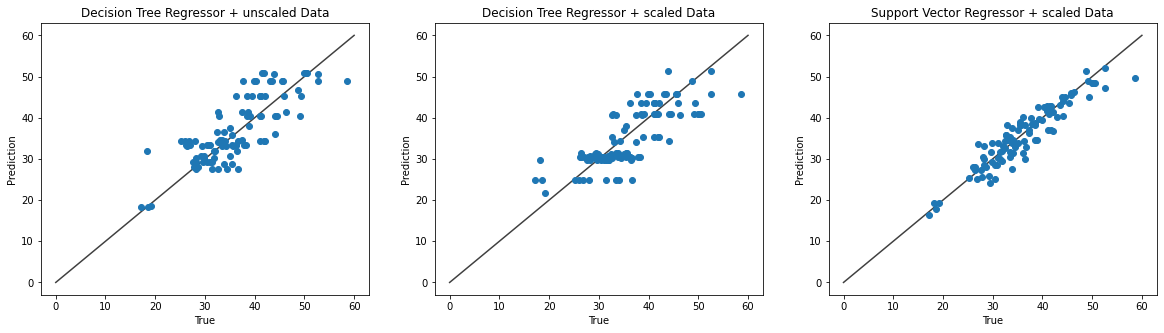

In [ ]:
import matplotlib.pyplot as plt

fig, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(20,5))


def myScatterPlot(ax, title, true, prediction):
  ax.plot([0,60], [0,60], 'k-', alpha=0.75, zorder=0)
  ax.set_xlabel('True')
  ax.set_ylabel('Prediction')
  ax.scatter(true, prediction);
  ax.title.set_text(title)

myScatterPlot(ax1, 'Decision Tree Regressor + unscaled Data', y, predict1)
myScatterPlot(ax2, 'Decision Tree Regressor + scaled Data', y, predict2)
myScatterPlot(ax3, 'Support Vector Regressor + scaled Data', y, predict3)



As the chart, The third chart is the best, those points are closer to the y=x line, that means the prediction values are more equal to true values.

### Conclusion: For this project, as the mean square errors and charts show, Support Vector Regressor + scaled Data set is the best way to do the prediction, its result is the best out of these three ways. 